In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

In [3]:
import os 
import zipfile

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image

## unzipping images
- WE will unzip the images to a folder so that we have it in a file we can access

In [7]:
zip_ref = zipfile.ZipFile("resources/VehicleDatasets.zip", mode="r")

In [8]:
zip_ref.extractall("resources/")

## We need a data dir 
- This will be a path for where ur images are stored

In [29]:
data_dir = "resources/vechicles"

In [30]:
os.listdir(data_dir)

['test', 'train']

## Creating training and testing Directory

In [31]:
train_dir = data_dir+"/train"

In [32]:
os.listdir(train_dir)

['bike',
 'boat',
 'bus',
 'car',
 'cycle',
 'helicopter',
 'plane',
 'scooty',
 'truck']

In [33]:
test_dir = data_dir+"/test"

In [34]:
os.listdir(test_dir)

['bike',
 'boat',
 'bus',
 'car',
 'cycle',
 'helicopter',
 'plane',
 'scooty',
 'truck']

## sampling one or to images 
- This will allow us to know if our directories are working properly

## Bike

In [35]:
os.listdir(train_dir+"/bike")[0]

'2Q__ (1).jpg'

In [36]:
bike_path= train_dir+"/bike/"+"2Q__ (1).jpg"

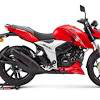

In [37]:
image.load_img(bike_path)

## Truck

In [38]:
os.listdir(train_dir+"/truck")[0]

'2Q__ (1).jpg'

In [39]:
truck_path= train_dir+"/truck/"+"2Q__ (1).jpg"

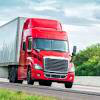

In [40]:
image.load_img(truck_path)

### Checking image size 
- WE will ned to set a input shape for the images going in to the model 
- we will discover this by searching the image size and averaging them

In [41]:
imread(bike_path).shape

(100, 100, 3)

###### Checking average dimansion

In [45]:
dim1 = []
dim2 = []

for image_name in os.listdir(test_dir+"/truck"):
    img = imread(test_dir+"/truck/"+image_name)
    d1,d2,c = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [46]:
np.mean(dim1)

145.6

In [48]:
np.mean(dim2)

202.4

In [284]:
average_img_size = (200, 200,3)

## Now that we the Average dimension 
- WE will need a generator to minipulate the image for better training

In [285]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [286]:
generator = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.6,
    horizontal_flip=True ,
    vertical_flip=True,
    fill_mode='nearest',
    rescale=1/255
)

## Testing generator 
- WE will test to see if the generator recognizes the classes 
- also how the generator minipulates the images

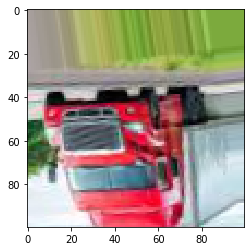

In [287]:
plt.imshow(generator.random_transform(imread(truck_path)))

In [288]:
generator.flow_from_directory(train_dir
                             )

Found 468 images belonging to 9 classes.


In [289]:
generator.flow_from_directory(test_dir)

Found 72 images belonging to 9 classes.


## Model generators
- we will need a training and testing generator for our model

In [290]:
train_gen = generator.flow_from_directory(
  train_dir,
    target_size=average_img_size[:2],
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True
)

Found 468 images belonging to 9 classes.


In [291]:
 test_gen = generator.flow_from_directory(
  test_dir,
    target_size=average_img_size[:2],
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 72 images belonging to 9 classes.


## Creating the model

In [299]:
model = Sequential()
model.add(Conv2D(filters = 32, padding = "same", kernel_size = (2,2), strides = (2,2), activation = "relu", input_shape = average_img_size))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 32, padding = "same", kernel_size = (2,2), strides = (2,2), activation = "relu", input_shape = average_img_size))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 64, padding = "same", kernel_size = (2,2), strides = (2,2), activation = "relu", input_shape = average_img_size))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(units = 132, activation = "relu"))
model.add(Dense(units = 60, activation = "relu"))
model.add(Dense(units = 9, activation = "softmax"))
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

## Fitting model
- We will use earlt stopping also to prevent overtraining

In [300]:
stop = EarlyStopping(monitor="val_loss", mode="min", patience=10)

In [301]:
model.fit_generator(train_gen, validation_data=test_gen, epochs=30, callbacks=[stop])

Epoch 1/30
15/15 [==============================] - 14s 902ms/step - loss: 2.2051 - accuracy: 0.1132 - val_loss: 2.2545 - val_accuracy: 0.0556
Epoch 2/30
15/15 [==============================] - 13s 856ms/step - loss: 2.1843 - accuracy: 0.1303 - val_loss: 2.2608 - val_accuracy: 0.0694
Epoch 3/30
15/15 [==============================] - 13s 860ms/step - loss: 2.1711 - accuracy: 0.1624 - val_loss: 2.2302 - val_accuracy: 0.1667
Epoch 4/30
15/15 [==============================] - 13s 864ms/step - loss: 2.1302 - accuracy: 0.1987 - val_loss: 2.1579 - val_accuracy: 0.1806
Epoch 5/30
15/15 [==============================] - 14s 925ms/step - loss: 2.1135 - accuracy: 0.2073 - val_loss: 2.1064 - val_accuracy: 0.1806
Epoch 6/30
15/15 [==============================] - 13s 895ms/step - loss: 2.0699 - accuracy: 0.2308 - val_loss: 2.1153 - val_accuracy: 0.2222
Epoch 7/30
15/15 [==============================] - 13s 863ms/step - loss: 1.9921 - accuracy: 0.2500 - val_loss: 2.1149 - val_accuracy: 0.2222

In [302]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 100, 100, 32)      416       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 25, 25, 32)        4128      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 6, 6, 64)          8256      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 576)             

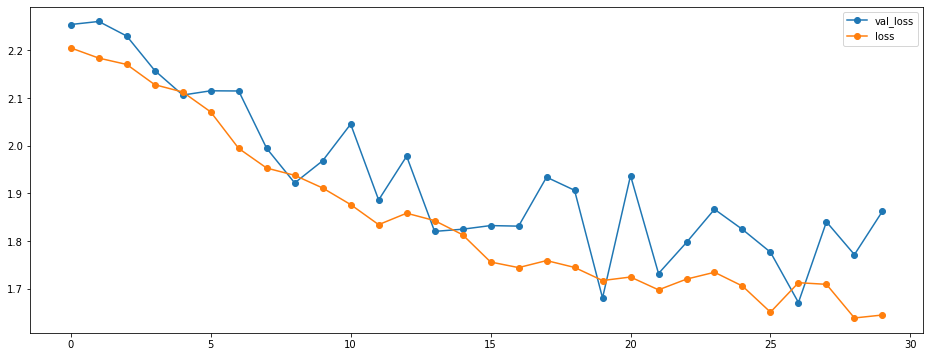

In [303]:
pd.DataFrame(model.history.history)[["val_loss","loss"]].plot(figsize = (16,6), marker = "o")

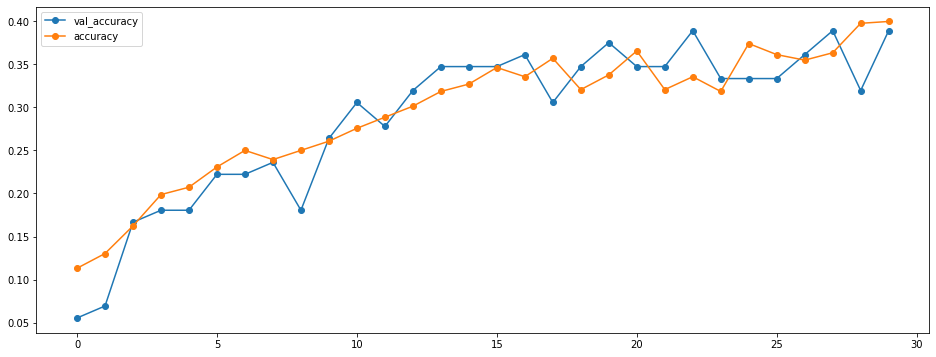

In [304]:
pd.DataFrame(model.history.history)[["val_accuracy","accuracy"]].plot(figsize = (16,6), marker = "o")

## Predicitons

In [305]:
predictions = model.predict_generator(test_gen)

In [306]:
pred = np.argmax(predictions, axis = 1)

In [307]:
pred

array([0, 7, 7, 0, 7, 0, 7, 3, 1, 1, 1, 1, 5, 6, 6, 1, 1, 3, 1, 2, 8, 2,
       2, 2, 2, 0, 7, 2, 2, 2, 3, 6, 3, 3, 6, 4, 4, 4, 4, 4, 4, 5, 5, 4,
       4, 5, 1, 7, 5, 5, 5, 7, 6, 5, 6, 7, 4, 1, 5, 0, 7, 7, 5, 2, 8, 5,
       2, 1, 3, 2, 3, 1])

## Comparison to true values 

In [308]:
from sklearn.metrics import classification_report, confusion_matrix, explained_variance_score

In [309]:
print(confusion_matrix(test_gen.classes, pred))

[[3 0 0 0 0 0 0 4 0]
 [0 6 0 2 0 1 2 0 0]
 [1 1 6 0 0 0 0 1 1]
 [0 0 2 3 0 0 2 0 0]
 [0 0 0 0 6 0 0 0 0]
 [0 1 0 0 2 6 0 2 0]
 [0 1 0 0 1 2 2 1 0]
 [1 0 0 0 0 0 0 2 0]
 [0 2 3 2 0 2 0 0 1]]


In [310]:
print(classification_report(test_gen.classes, pred))

              precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       0.55      0.55      0.55        11
           2       0.55      0.60      0.57        10
           3       0.43      0.43      0.43         7
           4       0.67      1.00      0.80         6
           5       0.55      0.55      0.55        11
           6       0.33      0.29      0.31         7
           7       0.20      0.67      0.31         3
           8       0.50      0.10      0.17        10

    accuracy                           0.49        72
   macro avg       0.48      0.51      0.46        72
weighted avg       0.51      0.49      0.47        72



In [311]:
print(explained_variance_score(test_gen.classes, pred))

-0.5299261225903262


### Testing on random bike image

In [312]:
from random import randint
random_index = randint(1, len(os.listdir(train_dir+"/scooty")))
random_imageName = os.listdir(train_dir+"/scooty")[random_index]
random_image_path = train_dir+"/scooty/"+random_imageName

In [313]:
random_image = image.load_img(random_image_path, target_size=average_img_size)

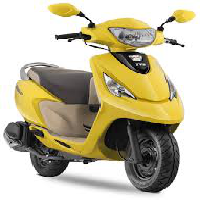

In [314]:
random_image

In [315]:
random_img_array = image.img_to_array(random_image)

In [316]:
random_img_array.shape

(200, 200, 3)

In [317]:
random_img_reshapes = np.expand_dims(random_img_array, axis=0)

In [318]:
random_img_reshapes.shape

(1, 200, 200, 3)

In [319]:
model.predict_classes(random_img_reshapes)

array([7])

In [320]:
test_gen.class_indices

{'bike': 0,
 'boat': 1,
 'bus': 2,
 'car': 3,
 'cycle': 4,
 'helicopter': 5,
 'plane': 6,
 'scooty': 7,
 'truck': 8}